In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib as plt
import h5py
from PIL import Image
import cv2
import matplotlib.pyplot as plt

2022-03-15 09:51:20.542673: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 09:51:20.542715: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.getcwd()

'/home/vividlee/Desktop/YeloCar'

In [3]:
# Again, 2022.03.15
# one final HDF5
# Model_deep4pc_test4_all

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

dataset_version = 'deep4pc_test4_all'

model_version = '0315_model_' + 'patience3'

createFolder('./Test/' + model_version)

with h5py.File('./Model/Model_' + dataset_version + '/dataset_hsv_' + dataset_version + '.hdf5', 'r') as hf:
    image_train = np.array(hf['x_train'][:, :, :, :])
    action_train = np.array(hf['y_train'][:, :])
    image_val = np.array(hf['x_val'][:, :, :, :])
    action_val = np.array(hf['y_val'][:, :])
    
    
(x_train, y_train), (x_test, y_test) = (image_train, action_train), (image_val, action_val)

x_train /= 255.
x_test /= 255.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(48, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

model.summary()

model_path = './Model/Model_test6_0315_' + dataset_version + '/' + model_version + '_{epoch:02d}-{val_mae:.4f}'

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath= model_path, monitor='val_mae', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=3)

history = model.fit(x=x_train, y=y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, checkpointer])

print("\n")
print(model.evaluate(x_test, y_test))


y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset

y_vmae = history.history['val_mae']
y_mae = history.history['mae']

print(y_vloss)
print(y_loss)
print(y_vmae)
print(y_mae)

outputs = model(x_test[0:20])

print(outputs)

f = open('./Test/' + model_version + '/' + model_version + '_test.txt', 'a')
f.write("{}".format(outputs))

x_test *= 255
    
for i in range (0, 20) :
    cv2.imwrite('./Test/' + model_version + '/'+ model_version + '_' + str(i) + '.jpeg', x_test[i])

2022-03-15 10:06:13.302209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vividlee/anaconda3/envs/py38/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-15 10:06:13.302319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vividlee/anaconda3/envs/py38/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-15 10:06:13.302393: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vividlee/anaconda3/envs/py38/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-15 10:06:13.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 12, 32)         9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 6, 32)         0

2022-03-15 10:06:13.412514: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6699405312 exceeds 10% of free system memory.


Epoch 1/100
710/710 [==============================] - ETA: 0s - loss: 0.0522 - mae: 0.0522 - mse: 0.0074
Epoch 00001: val_mae improved from inf to 0.07101, saving model to ./Model/Model_test6_0315_deep4pc_test4_all/0315_model_patience5_01-0.0710


2022-03-15 10:08:15.729071: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./Model/Model_test6_0315_deep4pc_test4_all/0315_model_patience5_01-0.0710/assets
710/710 [==============================] - 120s 168ms/step - loss: 0.0522 - mae: 0.0522 - mse: 0.0074 - val_loss: 0.0710 - val_mae: 0.0710 - val_mse: 0.0112
Epoch 2/100
710/710 [==============================] - ETA: 0s - loss: 0.0483 - mae: 0.0483 - mse: 0.0065
Epoch 00002: val_mae improved from 0.07101 to 0.06942, saving model to ./Model/Model_test6_0315_deep4pc_test4_all/0315_model_patience5_02-0.0694
INFO:tensorflow:Assets written to: ./Model/Model_test6_0315_deep4pc_test4_all/0315_model_patience5_02-0.0694/assets
710/710 [==============================] - 118s 166ms/step - loss: 0.0483 - mae: 0.0483 - mse: 0.0065 - val_loss: 0.0694 - val_mae: 0.0694 - val_mse: 0.0109
Epoch 3/100
710/710 [==============================] - ETA: 0s - loss: 0.0473 - mae: 0.0473 - mse: 0.0063
Epoch 00003: val_mae improved from 0.06942 to 0.06884, saving model to ./Model/Model_test6_0315_d

[0.07101207971572876, 0.06941789388656616, 0.06884469836950302, 0.06969855725765228, 0.06888938695192337, 0.07065195590257645]


[0.05218978226184845, 0.04832511767745018, 0.04733075201511383, 0.04650542885065079, 0.04579167068004608, 0.044918354600667953]


[0.07101207971572876, 0.06941789388656616, 0.06884469836950302, 0.06969855725765228, 0.06888938695192337, 0.07065195590257645]


[0.05218978226184845, 0.04832511767745018, 0.04733075201511383, 0.04650542885065079, 0.04579167068004608, 0.044918354600667953]


6




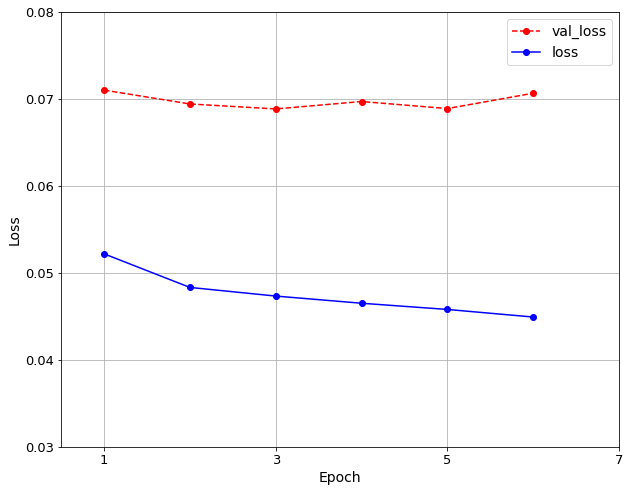

<function matplotlib.pyplot.show(close=None, block=None)>

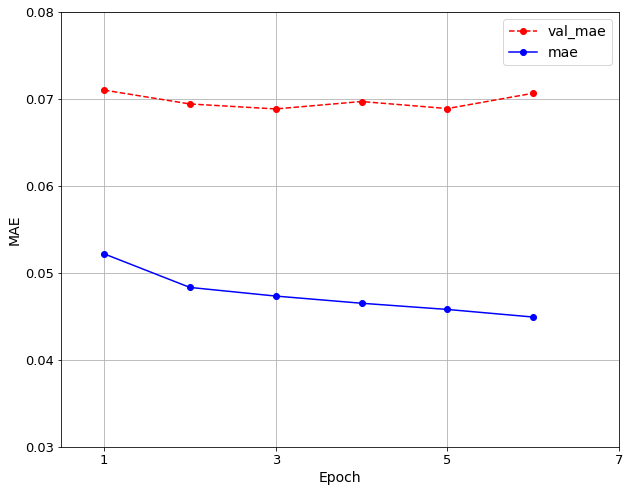

In [6]:
y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset
print(y_vloss)
print('\n')
print(y_loss)
print('\n')
y_vmae = history.history['val_mae']
y_mae = history.history['mae']
print(y_vmae)
print('\n')
print(y_mae)
print('\n')
x_len = np.arange(len(y_loss))
print(len(y_loss))
print('\n')

plt.figure(figsize=(10, 8))
plt.plot(x_len+1, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len+1, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0.5, len(y_loss)+0.5])
plt.ylim([0.03, 0.08])
plt.xticks([1, 3, 5, 7],fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(x_len+1, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len+1, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0.5, len(y_loss)+0.5])
plt.ylim([0.03, 0.08])
plt.xticks([1, 3, 5, 7], fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show